## Exercício 21
### Análise dos dados da COVID-19

In [1]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt

In [3]:
df1 =pd.read_csv('owid-covid-data.csv')

In [17]:
df2 = pd.read_csv('cases-brazil-states.csv')

In [7]:
df1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [8]:
df2.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### • Como foi a evolução mundial da COVID-19?

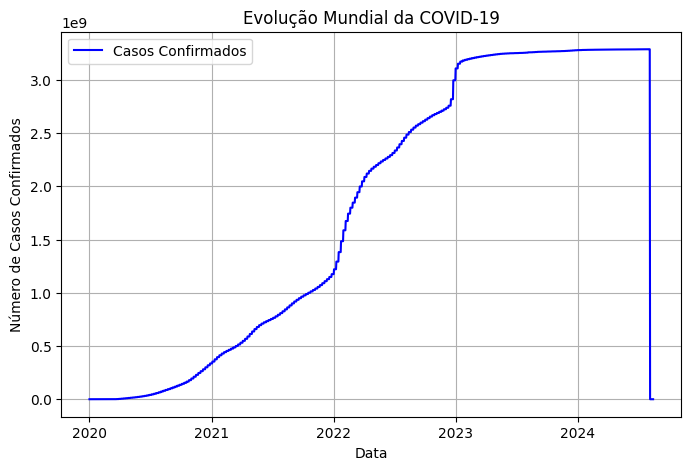

In [32]:
df1['date'] = pd.to_datetime(df1['date'])  

df1 = df1.groupby('date').sum().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(df1['date'], df1['total_cases'], label='Casos Confirmados', color='blue')
plt.title('Evolução Mundial da COVID-19')
plt.xlabel('Data')
plt.ylabel('Número de Casos Confirmados')
plt.legend()
plt.grid()
plt.show()

### • Quais são os 5 países com mais casos e mortes acumulados?

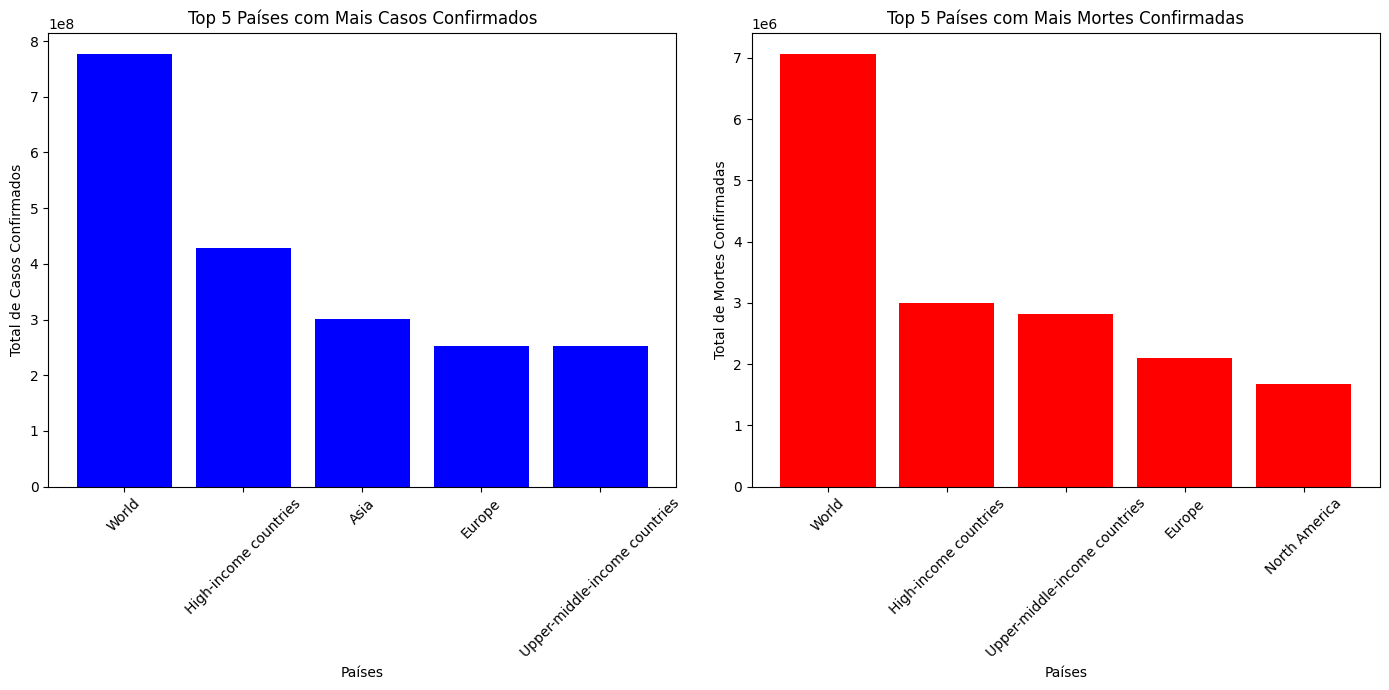

In [5]:
import seaborn as sns

# Agrupando os dados por país e somar os casos e mortes
df_country = df1.groupby('location')[['total_cases', 'total_deaths']].max().reset_index()

# Ordenando os países com mais casos e mortes
df_country_sorted_cases = df_country.sort_values('total_cases', ascending=False).head(5)
df_country_sorted_deaths = df_country.sort_values('total_deaths', ascending=False).head(5)

# Plotando os gráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico de casos
ax[0].bar(df_country_sorted_cases['location'], df_country_sorted_cases['total_cases'], color='blue')
ax[0].set_title('Top 5 Países com Mais Casos Confirmados')
ax[0].set_xlabel('Países')
ax[0].set_ylabel('Total de Casos Confirmados')
ax[0].tick_params(axis='x', rotation=45)

# Gráfico de mortes
ax[1].bar(df_country_sorted_deaths['location'], df_country_sorted_deaths['total_deaths'], color='red')
ax[1].set_title('Top 5 Países com Mais Mortes Confirmadas')
ax[1].set_xlabel('Países')
ax[1].set_ylabel('Total de Mortes Confirmadas')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### • Quais são os 5 países mais avançados em relação à vacinação da população?

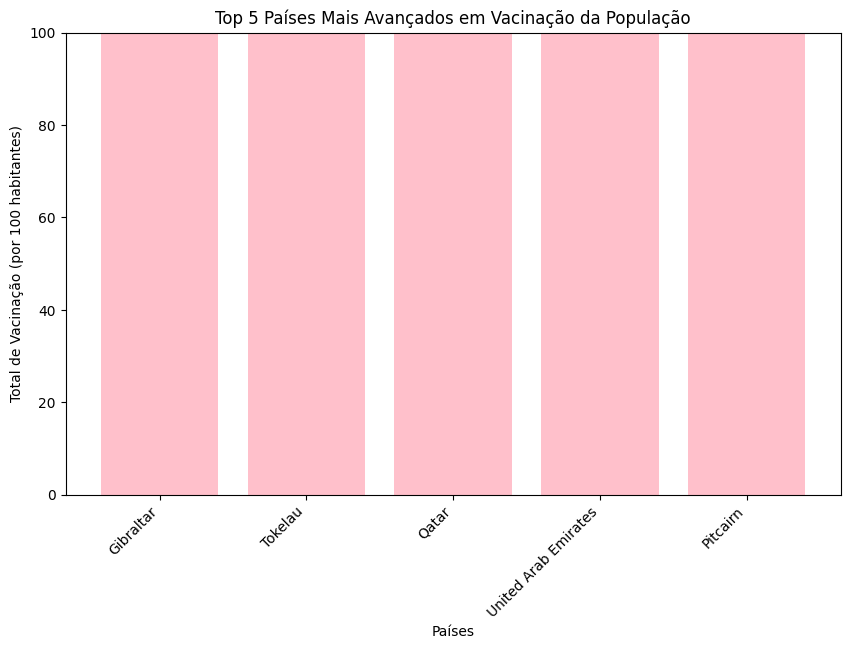

In [14]:
# Agrupando os dados por país e pegar o último valor de vacinação (vacinação por 100 habitantes)
df_last_vaccination = df1.groupby('location').last().reset_index()

# Ordenando os países pela maior porcentagem de vacinação
df_sorted = df_last_vaccination.sort_values('people_fully_vaccinated_per_hundred', ascending=False)

# Selecionando os 5 países mais vacinados
df_top5_vaccinated = df_sorted.head(5)

plt.figure(figsize=(10, 6))
plt.bar(df_top5_vaccinated['location'], df_top5_vaccinated['people_fully_vaccinated_per_hundred'], color='pink')
plt.title('Top 5 Países Mais Avançados em Vacinação da População')
plt.xlabel('Países')
plt.ylabel('Total de Vacinação (por 100 habitantes)')
plt.ylim(0, 100)  # Para mostrar a escala de 0 a 100%
plt.xticks(rotation=45, ha='right')  # Rotaciona os nomes dos países para melhorar a legibilidade
plt.show()

### • Como está a evolução de casos e mortes no Brasil em comparação com o mundo?

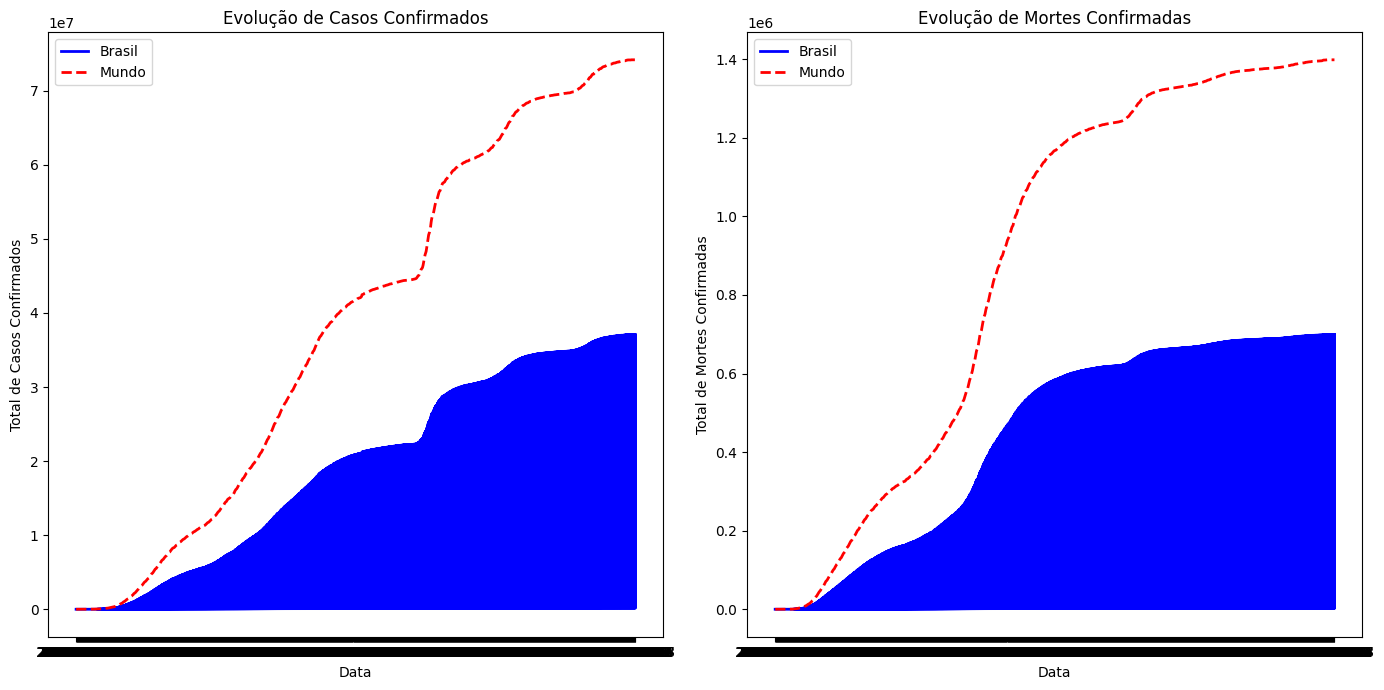

In [19]:
# Filtrando os dados para o Brasil
df_brazil = df2[df2['country'] == 'Brazil']

# Filtrando os dados para o mundo
df_world = df2.groupby('date').sum().reset_index()

# Criando gráficos de linha para a evolução de casos
plt.figure(figsize=(14, 7))

# Casos confirmados
plt.subplot(1, 2, 1)
plt.plot(df_brazil['date'], df_brazil['totalCases'], label='Brasil', color='blue', linewidth=2)
plt.plot(df_world['date'], df_world['totalCases'], label='Mundo', color='red', linewidth=2, linestyle='--')
plt.title('Evolução de Casos Confirmados')
plt.xlabel('Data')
plt.ylabel('Total de Casos Confirmados')
plt.legend()

# Mortes
plt.subplot(1, 2, 2)
plt.plot(df_brazil['date'], df_brazil['deaths'], label='Brasil', color='blue', linewidth=2)
plt.plot(df_world['date'], df_world['deaths'], label='Mundo', color='red', linewidth=2, linestyle='--')
plt.title('Evolução de Mortes Confirmadas')
plt.xlabel('Data')
plt.ylabel('Total de Mortes Confirmadas')
plt.legend()

plt.tight_layout()
plt.show()


### Quais são os 5 estados brasileiros com mais casos e mortes acumuladas?

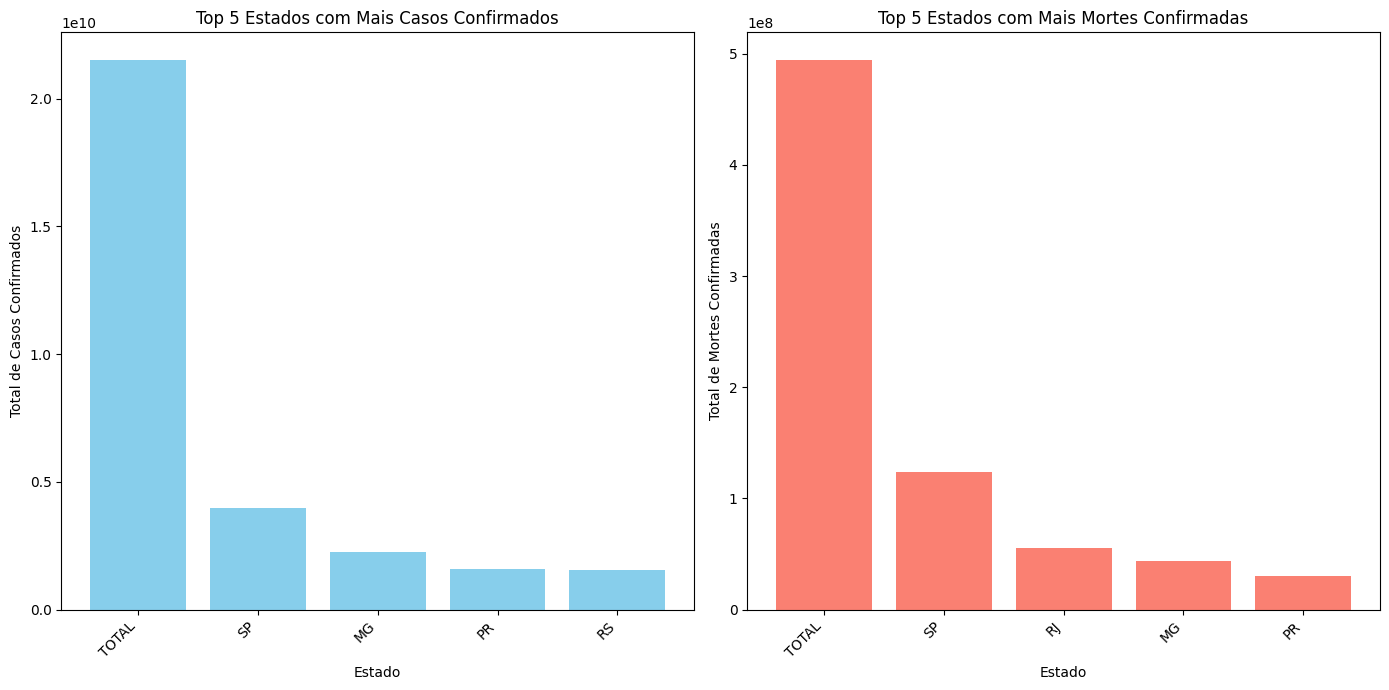

In [21]:
df_brazil_states = df2[df2['country'] == 'Brazil']

# Agrupando por estado e somar os casos e mortes acumuladas
df_states = df_brazil_states.groupby('state')[['totalCases', 'deaths']].sum().reset_index()

# Ordenando por casos e mortes acumuladas (em ordem decrescente)
df_states_sorted_cases = df_states.sort_values('totalCases', ascending=False)
df_states_sorted_deaths = df_states.sort_values('deaths', ascending=False)

# Selecionando os 5 estados com mais casos e mais mortes
top5_states_cases = df_states_sorted_cases.head(5)
top5_states_deaths = df_states_sorted_deaths.head(5)

# Gráfico de barras para os 5 estados com mais casos
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.bar(top5_states_cases['state'], top5_states_cases['totalCases'], color='skyblue')
plt.title('Top 5 Estados com Mais Casos Confirmados')
plt.xlabel('Estado')
plt.ylabel('Total de Casos Confirmados')
plt.xticks(rotation=45, ha='right')

# Gráfico de barras para os 5 estados com mais mortes
plt.subplot(1, 2, 2)
plt.bar(top5_states_deaths['state'], top5_states_deaths['deaths'], color='salmon')
plt.title('Top 5 Estados com Mais Mortes Confirmadas')
plt.xlabel('Estado')
plt.ylabel('Total de Mortes Confirmadas')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Justificativa para a Utilização de Cada Gráfico

1. **Gráfico de Linha (Evolução Mundial da COVID-19)**

   - **Justificativa**: O gráfico de linha foi utilizado para mostrar a **evolução temporal** dos casos confirmados ao longo do tempo. Esse tipo de gráfico é ideal para representar tendências e mudanças progressivas, permitindo visualizar o comportamento da pandemia globalmente. Ele ajuda a identificar picos, quedas e períodos estáveis de contaminação.

2. **Gráfico de Barras (Top 5 Países com Mais Casos e Mortes Confirmados)**

   - **Justificativa**: Os gráficos de barras são eficazes para comparar valores **absolutos** entre categorias (neste caso, países). Eles permitem identificar claramente quais são os países mais afetados, tanto em termos de casos quanto de mortes. As barras ajudam na comparação direta e rápida de magnitudes entre diferentes países.

3. **Gráfico de Barras (Top 5 Países com Maior Taxa de Vacinação)**

   - **Justificativa**: O gráfico de barras foi escolhido para mostrar a comparação entre os países com a maior **taxa de vacinação** (por 100 habitantes). Ele é uma escolha natural quando queremos destacar a diferença entre categorias e facilitar a comparação visual de valores absolutos, ajudando a identificar os países mais avançados na vacinação.

4. **Gráficos de Linha (Comparação de Casos e Mortes entre Brasil e o Mundo)**

   - **Justificativa**: O gráfico de linha é novamente ideal aqui para representar a **evolução temporal** tanto de casos quanto de mortes ao longo do tempo, para o Brasil e o mundo. Ele permite observar e comparar de forma clara como as curvas de contágio e mortes se comportaram em cada contexto, ajudando a entender o comportamento das duas variáveis ao longo dos meses.

5. **Gráficos de Barras (Top 5 Estados com Mais Casos e Mortes no Brasil)**

   - **Justificativa**: Como no gráfico de barras anterior, esses gráficos são utilizados para comparar as magnitudes dos casos e mortes acumuladas entre os estados brasileiros. O gráfico de barras é eficaz para identificar rapidamente quais estados foram mais impactados pela pandemia, facilitando a leitura e a comparação direta.